In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("D:/Online Course Recommendation/online_course_recommendation_v2.xlsx")

# Data

In [2]:
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


In [3]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken'],
      dtype='object')

# Inspecting Null Values

In [4]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

# Basic Statistical analysis

In [5]:
df.describe()

,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,3.959859,25052.822850,261.073369,0.746865,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.729958,14388.188356,139.013758,0.143683,13.669148,2.237259
min,1.000000,1.000000,5.00000,1.000000,50.000000,20.000000,0.092000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,3.500000,12583.750000,140.100000,0.649000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,4.000000,25057.500000,262.310000,0.750000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,4.500000,37522.000000,381.702500,0.851000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,5.000000,49999.000000,500.000000,1.000000,84.150000,19.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

# Dropping userid, courseid,course_name, instructor = not required 

In [7]:
df2 = df.drop(columns=['user_id', 'course_id', 'instructor'])

In [8]:
df2.shape

(100000, 11)

# Data Distribution for Numeric features

array([[<Axes: title={'center': 'course_duration_hours'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'enrollment_numbers'}>],
       [<Axes: title={'center': 'course_price'}>,
        <Axes: title={'center': 'feedback_score'}>,
        <Axes: title={'center': 'time_spent_hours'}>],
       [<Axes: title={'center': 'previous_courses_taken'}>, <Axes: >,
        <Axes: >]], dtype=object)

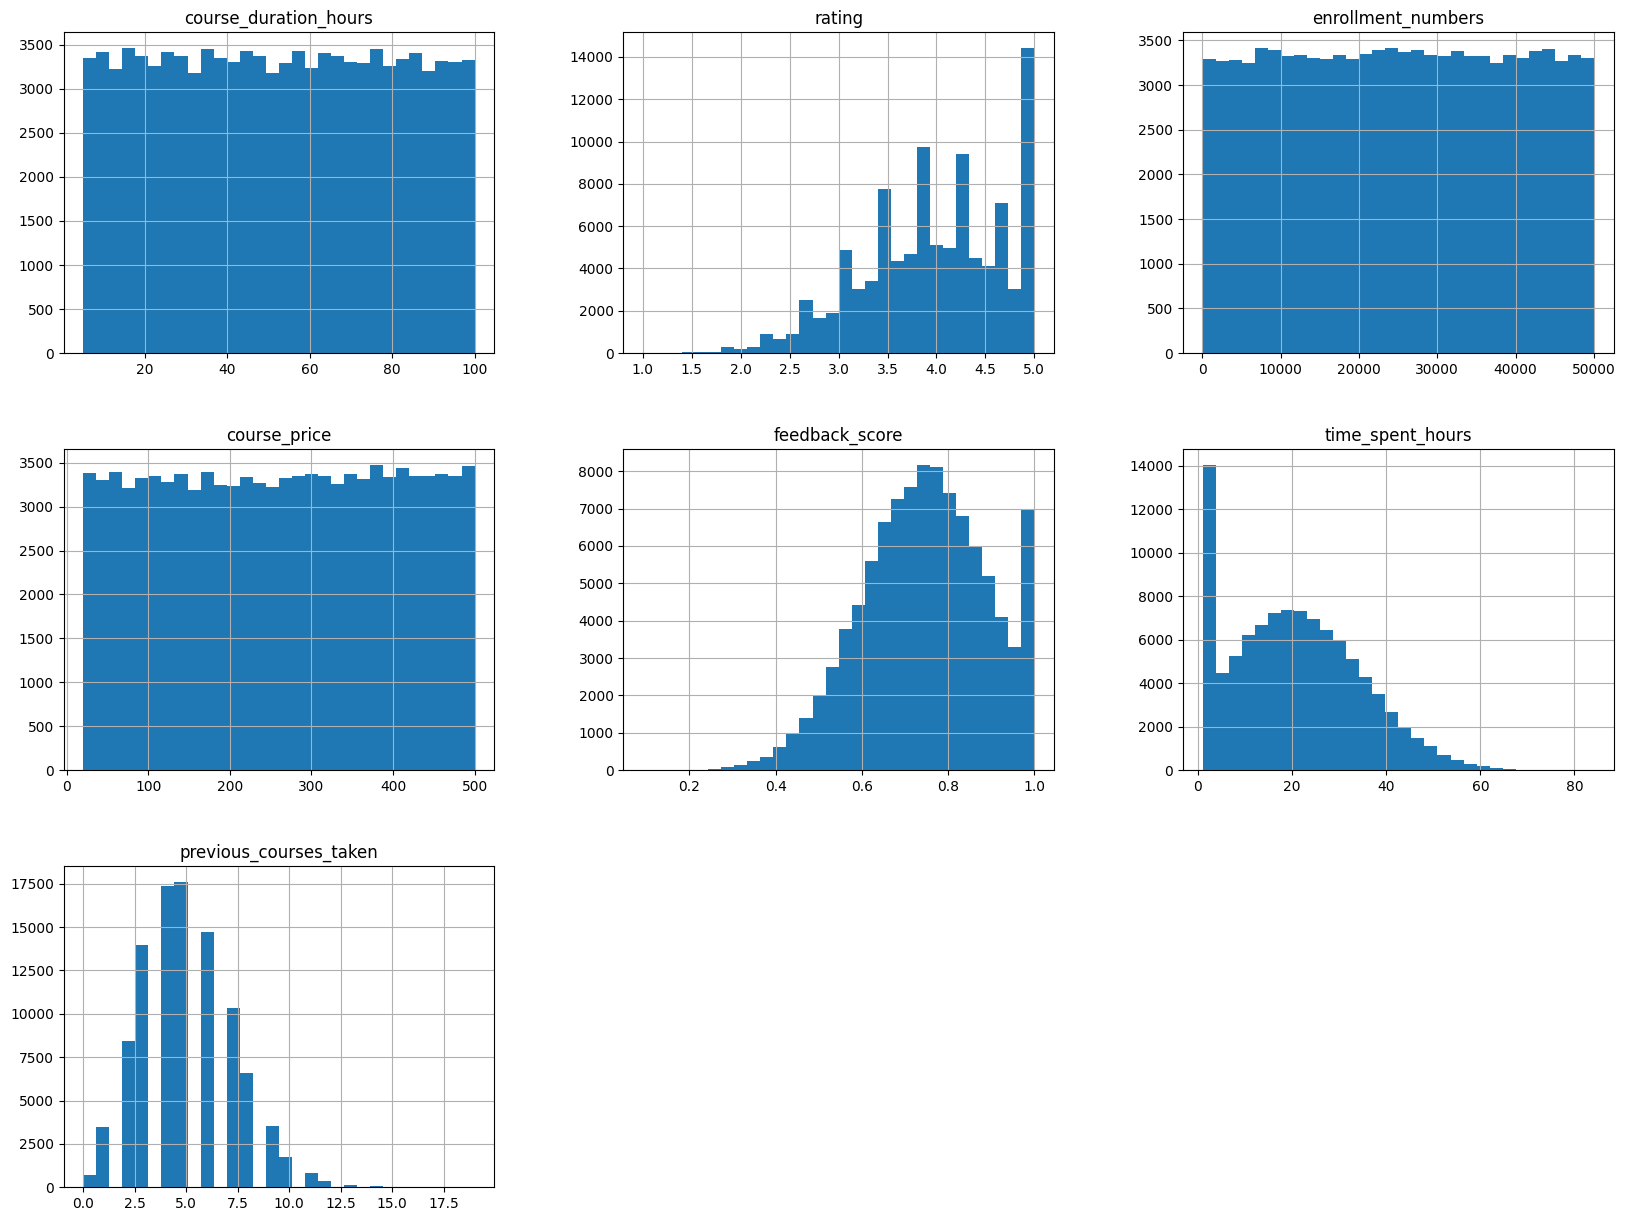

In [9]:
num_cols = df2.select_dtypes(include=['int64', 'float64']).columns

df2[num_cols].hist(bins=30, figsize=(20, 15))

# Data Distribution for Categorical features

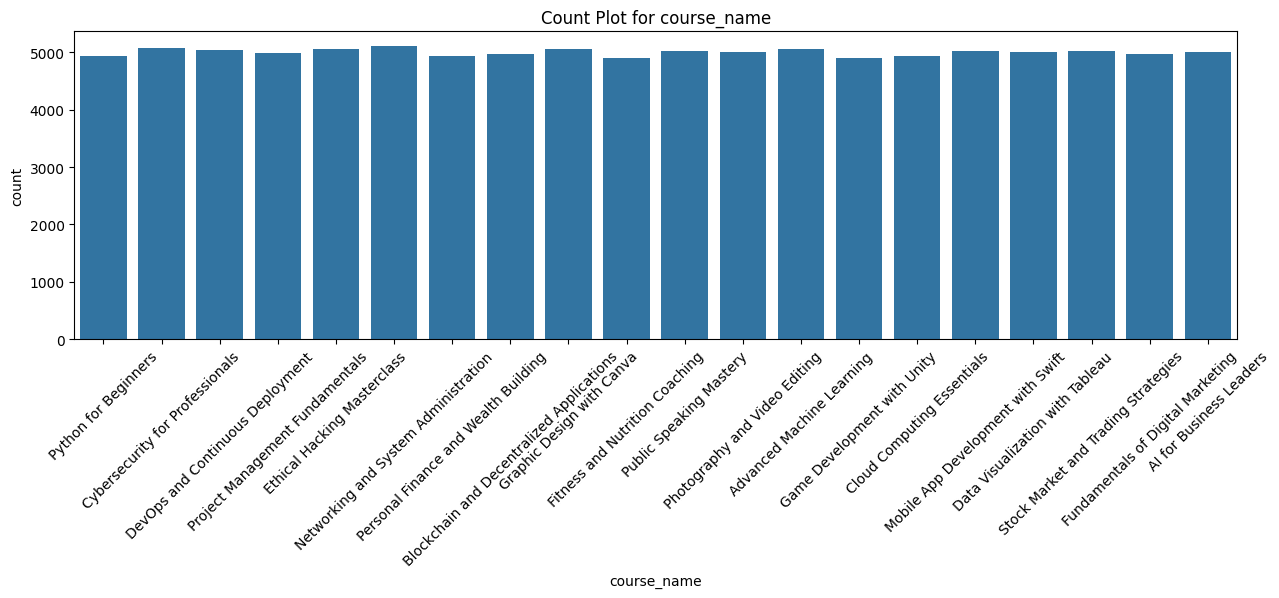

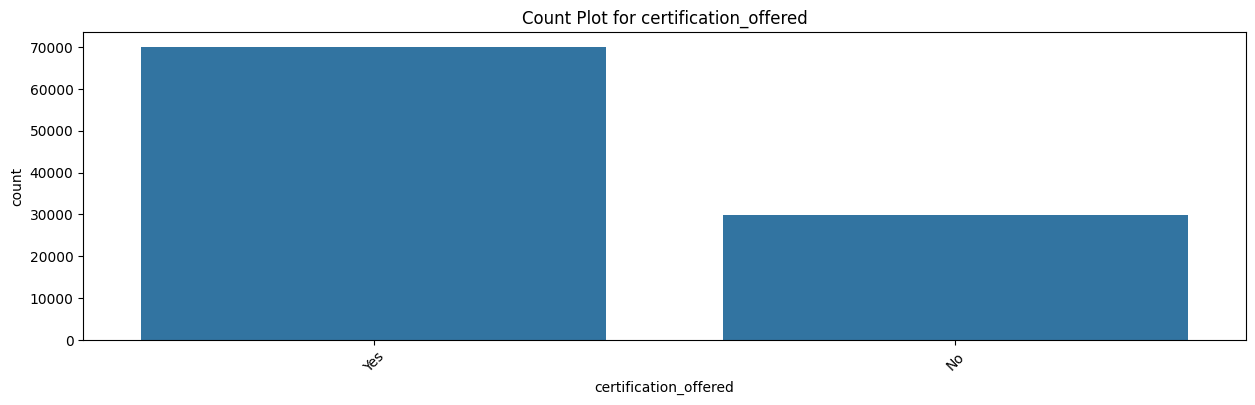

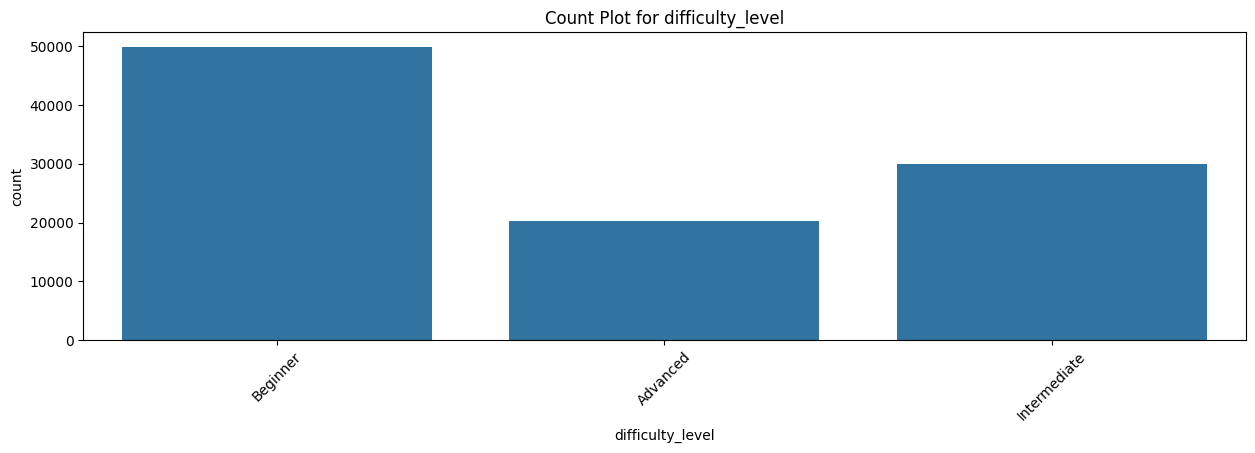

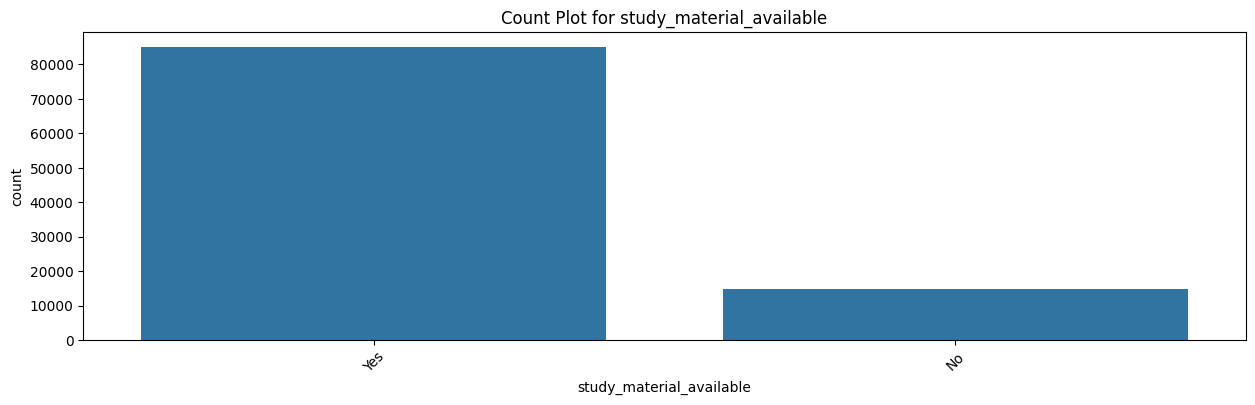

In [10]:
cat_cols = df2.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(15,4))
    sns.countplot(x=col, data=df2)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()


# Detecting Outliers

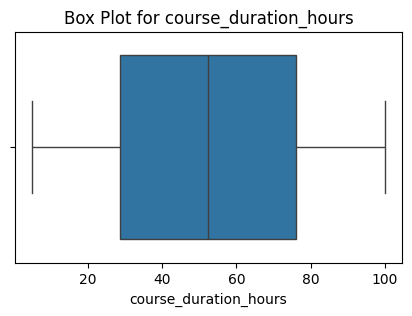

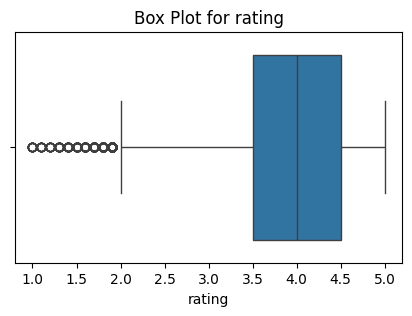

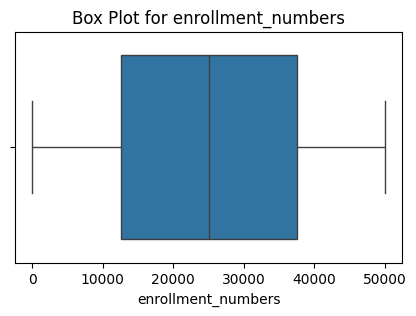

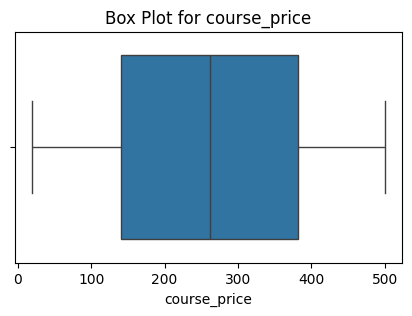

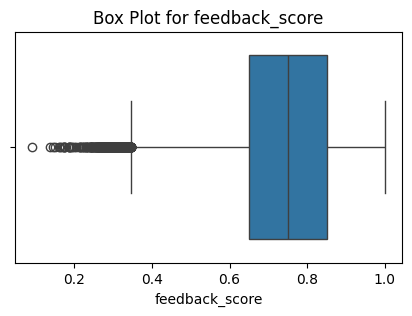

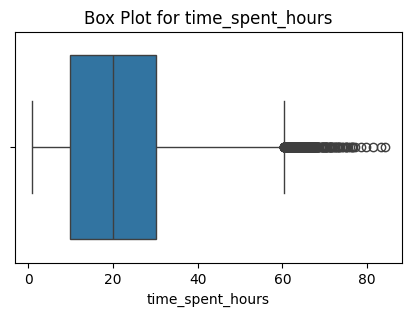

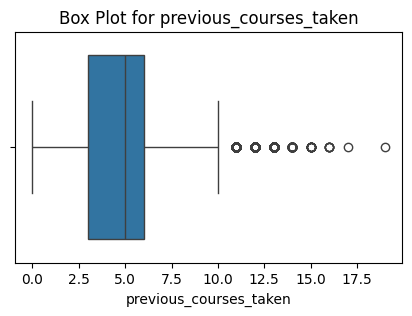

In [11]:
for cols in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df2[cols])
    plt.title(f'Box Plot for {cols}')
    plt.show()


# Handling  Outliers

In [12]:

df_og = df2.copy()

def handle_outliers(df2, columns):
    #df_clean = df2.copy()
    for col in columns:
        q1 = df2[col].quantile(0.25)
        q3 = df2[col].quantile(0.75)
        iqr = q3-q1
        lb = q1-1.5*iqr
        ub = q3+1.5*iqr
        df2 = df2[(df2[col] >= lb) & (df2[col] <= ub)]
    return df2

df2 = handle_outliers(df2, num_cols)
df2.shape
        
        

(97403, 11)

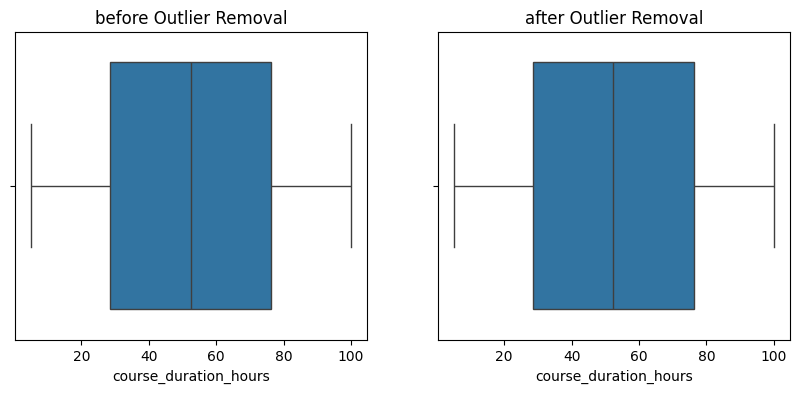

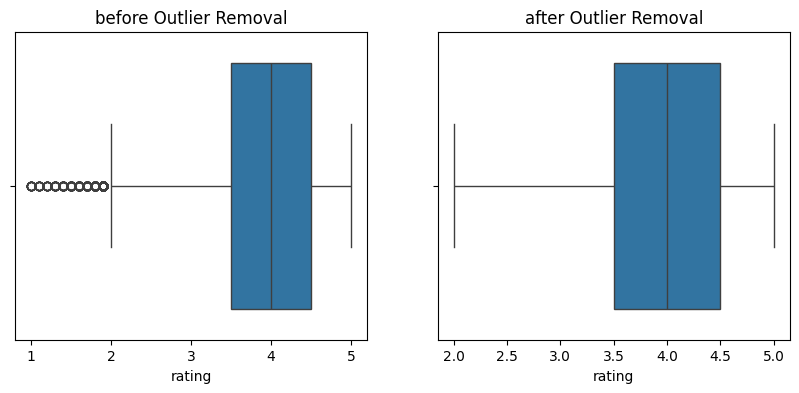

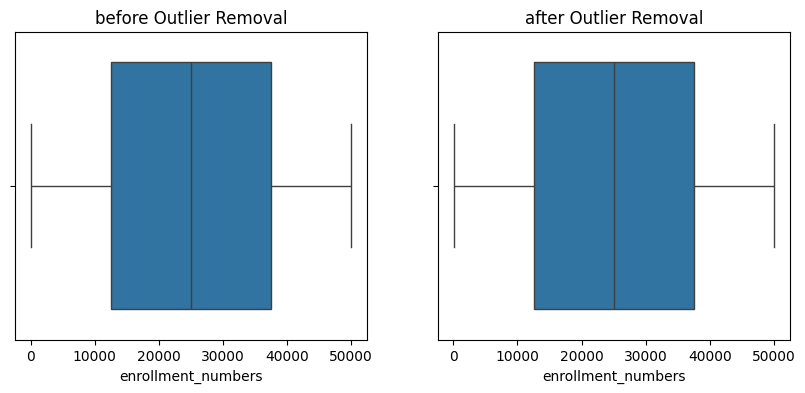

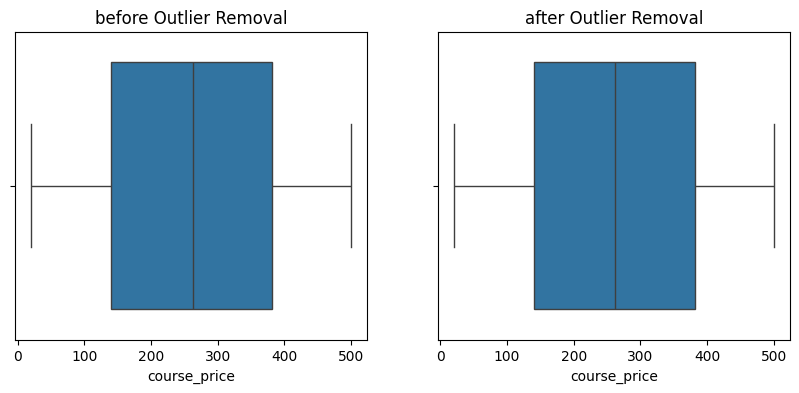

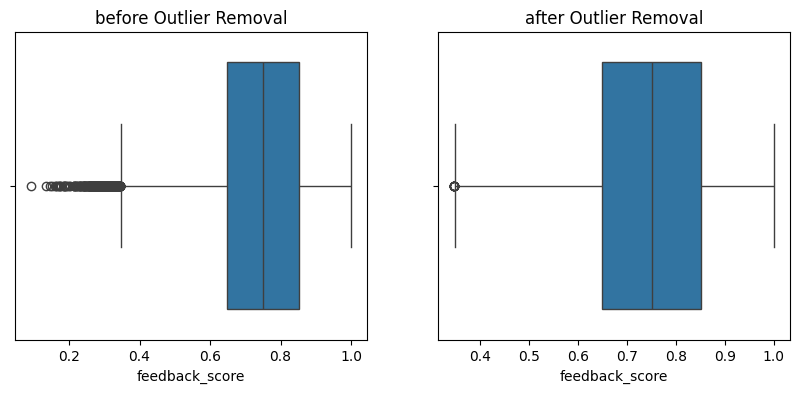

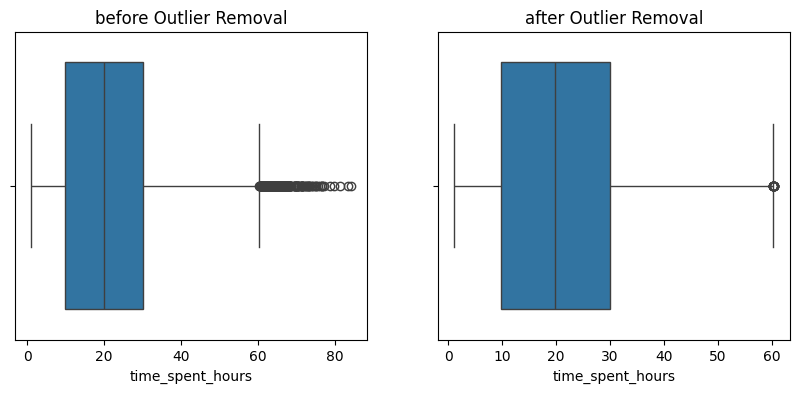

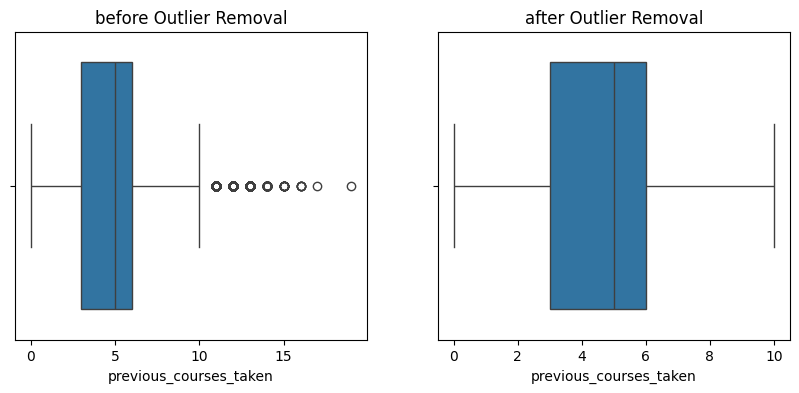

In [13]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_og[col])
    plt.title(f'before Outlier Removal')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df2[col])   
    plt.title(f'after Outlier Removal')
    plt.show()

In [14]:
df2.head() 

,course_name,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,Python for Beginners,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,Cybersecurity for Professionals,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,DevOps and Continuous Deployment,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,Project Management Fundamentals,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,Ethical Hacking Masterclass,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


# One Hot Encoding(coz our data dont have ordinanilty)

In [15]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


one important note is that when concatenating always create a DF and use index (index=df2.index) so that there is no mismatch of rows

In [16]:
CourseName_col = "course_name"  # We'll exclude this from features because we need this to find the index of the course

#cat_cols = df2.select_dtypes(include=['object']).columns.drop(CourseName_col)

cat_cols = ['certification_offered', 'difficulty_level', 'study_material_available']
num_cols = df2.select_dtypes(exclude=['object']).columns
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")


ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#encoded_cat = ohe.fit_transform(df2[cat_cols])
encoded_cat = pd.DataFrame(ohe.fit_transform(df2[cat_cols]), columns=ohe.get_feature_names_out(), index=df2.index)


encoded_cat = pd.DataFrame(encoded_cat, columns=ohe.get_feature_names_out(cat_cols))
encoded_cat.head()

Categorical columns: ['certification_offered', 'difficulty_level', 'study_material_available']
Numerical columns: Index(['course_duration_hours', 'rating', 'enrollment_numbers', 'course_price',
       'feedback_score', 'time_spent_hours', 'previous_courses_taken'],
      dtype='object')


,certification_offered_No,certification_offered_Yes,difficulty_level_Advanced,difficulty_level_Beginner,difficulty_level_Intermediate,study_material_available_No,study_material_available_Yes
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Scalling(minmax coz our data is skewed)

In [17]:
scaler = MinMaxScaler()
#scaled_num = scaler.fit_transform(df2[num_cols])
scaled_num = pd.DataFrame(scaler.fit_transform(df2[num_cols]), columns=num_cols, index=df2.index)

scaled_num = pd.DataFrame(scaled_num, columns=num_cols)
scaled_num.head()

,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
0,0.358947,1.000000,0.431440,0.619792,0.689127,0.279744,0.4
1,0.329474,0.766667,0.306893,0.043729,0.647779,0.471352,0.9
2,0.088421,0.633333,0.127750,0.751688,0.650842,0.866869,0.4
3,0.561053,0.366667,0.964884,0.672500,0.952527,0.358780,0.6
4,0.271579,0.266667,0.690825,0.752104,0.318530,0.354061,0.5


# Combine all features


In [18]:
#processed_df = pd.concat([scaled_num, encoded_cat], axis=1)
processed_df = pd.concat([df2[[CourseName_col]], scaled_num, encoded_cat], axis=1)

processed_df.head()

,course_name,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken,certification_offered_No,certification_offered_Yes,difficulty_level_Advanced,difficulty_level_Beginner,difficulty_level_Intermediate,study_material_available_No,study_material_available_Yes
0,Python for Beginners,0.358947,1.000000,0.431440,0.619792,0.689127,0.279744,0.4,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Cybersecurity for Professionals,0.329474,0.766667,0.306893,0.043729,0.647779,0.471352,0.9,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,DevOps and Continuous Deployment,0.088421,0.633333,0.127750,0.751688,0.650842,0.866869,0.4,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Project Management Fundamentals,0.561053,0.366667,0.964884,0.672500,0.952527,0.358780,0.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,Ethical Hacking Masterclass,0.271579,0.266667,0.690825,0.752104,0.318530,0.354061,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [19]:
processed_df.isnull().sum() 

course_name                      0
course_duration_hours            0
rating                           0
enrollment_numbers               0
course_price                     0
feedback_score                   0
time_spent_hours                 0
previous_courses_taken           0
certification_offered_No         0
certification_offered_Yes        0
difficulty_level_Advanced        0
difficulty_level_Beginner        0
difficulty_level_Intermediate    0
study_material_available_No      0
study_material_available_Yes     0
dtype: int64

In [20]:
#processed_df[CourseName_col] = df2[CourseName_col].values

In [21]:
df_encoded = processed_df.fillna(0)

In [22]:
df_encoded.shape

(97403, 15)

In [23]:
# Save course names and features
course_names = df_encoded[CourseName_col] # to find the index of the course later
features = df_encoded.drop(CourseName_col, axis=1)

# Using KNearestNeighbours, with cosine

In [24]:
from sklearn.neighbors import NearestNeighbors

# Fit Nearest Neighbors model
model = NearestNeighbors(n_neighbors=6, metric='cosine')
model.fit(features)


,n_neighbors,6
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [25]:
# Recommendation function
def recommend(course_name, n=5):
    if course_name not in course_names.values:
        return f"Course '{course_name}' not found."

    idx = course_names[course_names == course_name].index[0]# finding the index of the course here
    course_vector = features.iloc[[idx]]
    distances, indices = model.kneighbors(course_vector, n_neighbors=n+1)

    recommended_courses = course_names.iloc[indices[0][1:]].values.tolist()
    return recommended_courses

In [37]:
import pickle

# Save the trained NearestNeighbors model
#with open("model.pkl", "wb") as f:
#    pickle.dump(model, f)




with open("model.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "features": features,
        "course_names": course_names
    }, f)


# Save features and course_names
with open("features.pkl", "wb") as f:
    pickle.dump(features, f)

with open("course_names.pkl", "wb") as f:
    pickle.dump(course_names, f)

print("Model and data files saved: nearest_neighbors_model.pkl, features.pkl, course_names.pkl")


Model and data files saved: nearest_neighbors_model.pkl, features.pkl, course_names.pkl


In [26]:
# Example usage
print(recommend("Python for Beginners", n=3))


['Data Visualization with Tableau', 'AI for Business Leaders', 'Mobile App Development with Swift']


# using cosine similarity directly

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_cosine(course_name, n=5):
    if course_name not in course_names.values:
        return f"Course '{course_name}' not found."

    idx = course_names[course_names == course_name].index[0]

    course_vector = features.iloc[[idx]] 
    similarities = cosine_similarity(course_vector, features)[0] 

    similar_indices = similarities.argsort()[::-1][1:n+1]

    recommended_courses = course_names.iloc[similar_indices].values.tolist()

    return recommended_courses


print(recommend_cosine("Python for Beginners", n=3))

['Data Visualization with Tableau', 'AI for Business Leaders', 'Mobile App Development with Swift']


Model and data files saved: nearest_neighbors_model.pkl, features.pkl, course_names.pkl


#   Feature	                cosine_similarity() manually  vs	NearestNeighbors(metric='cosine')

✅ Handles large datasets	❌ Slow for big data	        ✅ Efficient with indexing

✅ Gives actual neighbors	❌ Needs sorting manually	✅ Built-in .kneighbors() method

✅ Easy to scale	            ❌ Needs custom logic	    ✅ Plug-and-play

✅ Clean integration	        ❌ More boilerplate	        ✅ Simple & fast

Popularity-Based Recommendation Model

In [28]:
# Business Use:
# 1. Useful for new users (cold start) or marketing campaigns—recommend the most popular (highest rated/enrolled) courses irrespective of user profile.
# How it works:
# Ranks courses by a popularity metric (e.g., enrollment_numbers × rating).

In [29]:
def recommend_popular(n=5):
   
    df_popular = df2.copy()
    df_popular['popularity'] = df_popular['enrollment_numbers'] * df_popular['rating']
    popular_courses = df_popular.sort_values('popularity', ascending=False)['course_name'].head(n)
    return popular_courses.tolist()

print(recommend_popular(3))

['Python for Beginners', 'Networking and System Administration', 'Cybersecurity for Professionals']


Price-Sensitive Recommendation Model

In [30]:
# Price-Sensitive Recommendation Model 
# Business Use:
# Target price-conscious users or run campaigns for affordable courses.
# How it works:
# Recommends top-rated courses below a certain price threshold.

In [31]:
def recommend_affordable(top_n=5, price_limit=200):
    df_affordable = df2[df2['course_price'] <= price_limit]
    affordable_courses = df_affordable.sort_values('rating', ascending=False)['course_name'].head(top_n)
    return affordable_courses.tolist()

print(recommend_affordable(3, price_limit=200))

['DevOps and Continuous Deployment', 'Graphic Design with Canva', 'Cybersecurity for Professionals']


In [32]:
 #Feedback-Driven Recommendation Model